#  EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv(r'/content/archive.zip', encoding='ISO-8859-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [ ]:
#show the no.of missing(NAN,NaN,na)data for each column
df.isnull().sum()



v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
#removing unneccessary columns from the dataset
df.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1,inplace=True)

In [ ]:
#changing the column name for better understanding(V1,V2 to SPAM,TEXT)
df.rename({'v1': 'SPAM','v2': 'TEXT'},axis=1,inplace=True)
df.head()

,SPAM,TEXT
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.duplicated().sum()


403

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.duplicated().sum()


0

In [ ]:
#converting SPAM column to numerical values
df['SPAM'] = df['SPAM'].map({'ham': 0, 'spam': 1})


# VISUALIZATION

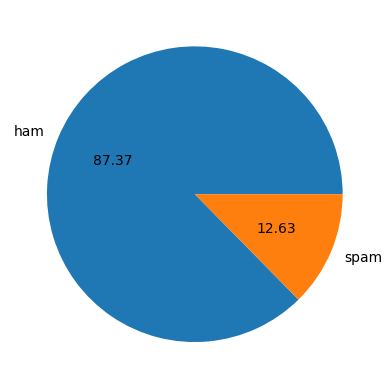

In [ ]:
plt.pie(df['SPAM'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

# SPLITTING INTO TRAINING AND TESTING DATA

In [ ]:
X=df['TEXT']
y=df['SPAM']

In [ ]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: TEXT, Length: 5169, dtype: object

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: SPAM, Length: 5169, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=43)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4135,)
(4135,)
(1034,)
(1034,)


In [ ]:
#preprocessing tool or utility class (LABELENCODER)
from sklearn.preprocessing import LabelEncoder
ec=LabelEncoder()
df['SPAM']=ec.fit_transform(df['SPAM'])
df['SPAM']


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: SPAM, Length: 5169, dtype: int64

In [ ]:
ec=LabelEncoder()
y_train = ec.fit_transform(y_train)
y_test = ec.transform(y_test)



In [ ]:
print(X_train)
print(X_test)


1064    That's fine, I'll bitch at you about it later ...
2460    i cant talk to you now.i will call when i can....
5015      Hey gals...U all wanna meet 4 dinner at nÌÂte? 
1929    Free 1st week entry 2 TEXTPOD 4 a chance 2 win...
2574    Your next amazing xxx PICSFREE1 video will be ...
                              ...                        
311     Think ur smart ? Win å£200 this week in our we...
2146                            So can collect ur laptop?
2425    Hey!!! I almost forgot ... Happy B-day babe ! ...
2402    Oh oh... Wasted... Den muz chiong on sat n sun...
3595               Good morning princess! Happy New Year!
Name: TEXT, Length: 4135, dtype: object
5567    This is the 2nd time we have tried 2 contact u...
4361    I can't right this second, gotta hit people up...
583     my ex-wife was not able to have kids. Do you w...
4062                How are you. Its been ages. How's abj
4572    \URGENT! This is the 2nd attempt to contact U!...
                              ..

In [ ]:
#feature extraction technique (COUNTVECTORIZER)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data
X_train_cv = cv.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test_cv = cv.transform(X_test)
print(X_train_cv)


  (0, 6698)	1
  (0, 2811)	1
  (0, 4104)	1
  (0, 1354)	1
  (0, 1103)	1
  (0, 7563)	1
  (0, 741)	1
  (0, 3708)	1
  (0, 3981)	1
  (0, 6715)	1
  (1, 7563)	1
  (1, 1627)	1
  (1, 6594)	1
  (1, 6812)	1
  (1, 4769)	1
  (1, 7377)	1
  (1, 1594)	1
  (1, 7340)	1
  (1, 1616)	1
  (1, 2366)	1
  (1, 3857)	1
  (1, 1605)	1
  (2, 1103)	1
  (2, 3369)	1
  (2, 3022)	1
  :	:
  (4131, 3969)	1
  (4131, 1871)	1
  (4132, 3369)	1
  (4132, 2149)	1
  (4132, 2903)	1
  (4132, 1176)	1
  (4132, 4165)	1
  (4132, 7523)	1
  (4132, 3287)	1
  (4132, 906)	1
  (4133, 4842)	2
  (4133, 4862)	1
  (4133, 2209)	1
  (4133, 4593)	1
  (4133, 5811)	1
  (4133, 4041)	1
  (4133, 6498)	1
  (4133, 7258)	1
  (4133, 1778)	1
  (4134, 4686)	1
  (4134, 4517)	1
  (4134, 3139)	1
  (4134, 7538)	1
  (4134, 3287)	1
  (4134, 5328)	1


# IMPORTING MACHINE LEARNING MODELS

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


# 01-LOGISTIC REGRESSION

In [ ]:
#create and train the LOGISTIC REGRESSION
ln=LogisticRegression()
ln.fit(X_train_cv,y_train)
prediction_train=ln.predict(X_train_cv)
prediction_test=ln.predict(X_test_cv)


In [ ]:
#printing predictions and actual values after trained
print(ln.predict(X_train_cv))
print(y_train)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
#Evaluate the model on the training dataset
from sklearn.metrics import accuracy_score,confusion_matrix
print('confusion matrix:\n',confusion_matrix(y_train,prediction_train))
print('Accuracy:',accuracy_score(y_train,prediction_train))

confusion matrix:
 [[3621    0]
 [  10  504]]
Accuracy: 0.9975816203143894


# 02-Multinomial Naive Bayes

In [ ]:
#create and train the NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB().fit(X_train_cv,y_train)
naive_bayes.fit(X_train_cv,y_train)


MultinomialNB()

In [ ]:
#printing predictions and actual values after trained
print(naive_bayes.predict(X_train_cv))
print(y_train)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
#Evaluate the model on the training dataset
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
prediction=naive_bayes.predict(X_train_cv)
print(classification_report(y_train,prediction))
print()
print('confusion Matrix:\n',confusion_matrix(y_train,prediction))
print()
print('Accuracy:', accuracy_score(y_train,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3621
           1       0.98      0.97      0.97       514

    accuracy                           0.99      4135
   macro avg       0.99      0.98      0.98      4135
weighted avg       0.99      0.99      0.99      4135


confusion Matrix:
 [[3611   10]
 [  17  497]]

Accuracy: 0.9934703748488513


In [ ]:
#printing predictions and actual values after testing
print(naive_bayes.predict(X_test_cv))
print(y_test)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [ ]:
#Evaluate the model on the testing dataset
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pred=naive_bayes.predict(X_test_cv)
print(classification_report(y_test,pred))
print()
print('confusion Matrix:\n',confusion_matrix(y_test,pred))
print()
print('Accuracy:', accuracy_score(y_test,pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.97      0.93      0.95       139

    accuracy                           0.99      1034
   macro avg       0.98      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034


confusion Matrix:
 [[891   4]
 [ 10 129]]

Accuracy: 0.9864603481624759


#TASK3 COMPLETED SUCCESSFULLY